In [1]:
import numpy as np
import pandas as pd
import sys
import os
from matplotlib import pyplot as plt
os.path.split(os.path.dirname(""))

('', '')

In [2]:
#app path
sys.path.insert(0, os.path.join(os.path.split(os.path.abspath(""))[0], "app"))
from preprocessing import CsvRefactorer, path
from analytics import WaterFlowRates, WaterTemperatures, PumpsCurrents

* 299 Т1к после ТО
* 307 P1контура
* 309 Р2контура
* 313 Рградирни
* 315 Т1к перед ТО
* 317 Т2к перед ТО
* 319 Т2к после ТО
* 325 Т2к выхТО1
* 327 Твозвуха
* 381 Iвг1
* 395 Iвг2
* 396 Iвг3
* 460 Т2к выхТО2
* 461 Т2к выхТО3
* 462 Т2к выхТО4
* 463 Т2к выхТО5
* 480 Q1контура
* 481 Q2контура








In [3]:
df_refactorer = CsvRefactorer.read_csv(path)
df_refactorer.ids, type(df_refactorer.ids)

(array([299, 307, 309, 313, 315, 317, 319, 325, 327, 381, 395, 396, 460,
        461, 462, 463, 480, 481]),
 numpy.ndarray)

In [4]:
id_dfs = df_refactorer.select_by_ids([299, 307, 309, 315, 317, 319, 325, 327, 481])
id_dfs

[                          ID      Value
 Timestamp                              
 2022-10-04 09:07:29.825  299  23.000000
 2022-10-04 09:07:58.075  299  23.000000
 2022-10-04 09:08:00.092  299  23.000000
 2022-10-04 09:08:02.092  299  23.000000
 2022-10-04 09:08:59.126  299  23.000000
 ...                      ...        ...
 2022-12-23 15:35:03.593  299  23.799999
 2022-12-23 15:35:59.594  299  23.799999
 2022-12-23 15:36:01.594  299  23.799999
 2022-12-23 15:36:03.594  299  23.799999
 2022-12-23 15:36:12.111  299  23.700001
 
 [158091 rows x 2 columns],
                           ID  Value
 Timestamp                          
 2022-10-04 09:07:27.291  307   0.06
 2022-10-04 09:08:27.626  307   0.06
 2022-10-04 09:09:27.843  307   0.06
 2022-10-04 09:10:27.877  307   0.06
 2022-10-04 09:11:28.128  307   0.06
 ...                      ...    ...
 2022-12-23 15:32:36.925  307   0.09
 2022-12-23 15:33:07.558  307   0.06
 2022-12-23 15:34:07.575  307   0.06
 2022-12-23 15:35:07.593  307 

In [5]:
id_dfs_grouped = df_refactorer.min_frac_groupby(5, *id_dfs)

In [6]:
df = df_refactorer.create_df_from_dfs("ID", id_dfs_grouped)

In [7]:
time_periods = [("2022-10-17", "2022-10-21"), ("2022-11-08","2022-11-11"), ("2022-11-15","2022-11-18"),
           ("2022-11-22","2022-11-25"), ("2022-11-29","2022-12-02"), ("2022-12-05","2022-12-09"), 
           ("2022-12-12","2022-12-16"), ("2022-12-19","2022-12-23")]

In [8]:
periods = CsvRefactorer.select_time_period(df, time_periods)
periods

{'2022-10-17 2022-10-21':                            299       307       309        315        317  \
 Timestamp                                                                  
 2022-10-17 14:15:00  21.000000  0.060000  0.271818  20.500000  13.340000   
 2022-10-17 14:20:00  20.875000  0.077143  0.420000  20.625000  11.412500   
 2022-10-17 14:25:00  19.126316  0.140000  0.420000  21.226105  11.660000   
 2022-10-17 14:30:00  18.515000  0.150000  0.420000  18.984000  12.152941   
 2022-10-17 14:35:00  17.305000  0.150000  0.420000  18.390000  12.355555   
 ...                        ...       ...       ...        ...        ...   
 2022-10-21 19:15:00  27.820000  0.150000  0.453636  29.840000  19.531579   
 2022-10-21 19:20:00  25.945000  0.150000  0.454615  27.595000  18.968421   
 2022-10-21 19:25:00  24.375000  0.150000  0.454167  25.780000  18.378948   
 2022-10-21 19:30:00  23.050000  0.141429  0.455263  24.255000  17.810000   
 2022-10-21 19:35:00  22.111111  0.058000  0.305455

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2022-10-17 2022-10-21 758.2144153815193
2022-10-17 2022-10-21 6.24336236330576
2022-11-08 2022-11-11 746.589182900433
2022-11-08 2022-11-11 6.124845199956967
2022-11-15 2022-11-18 730.3966711537382
2022-11-15 2022-11-18 6.115045726657194
2022-11-22 2022-11-25 687.9756463146315
2022-11-22 2022-11-25 6.383896343895179
2022-11-29 2022-12-02 686.1866451757021
2022-11-29 2022-12-02 6.223195833724443
2022-12-05 2022-12-09 691.6078949067863
2022-12-05 2022-12-09 5.9923457841832715
2022-12-12 2022-12-16 682.0440620673896
2022-12-12 2022-12-16 5.899125982231209
2022-12-19 2022-12-23 624.2076174149386
2022-12-19 2022-12-23 6.217316722917971


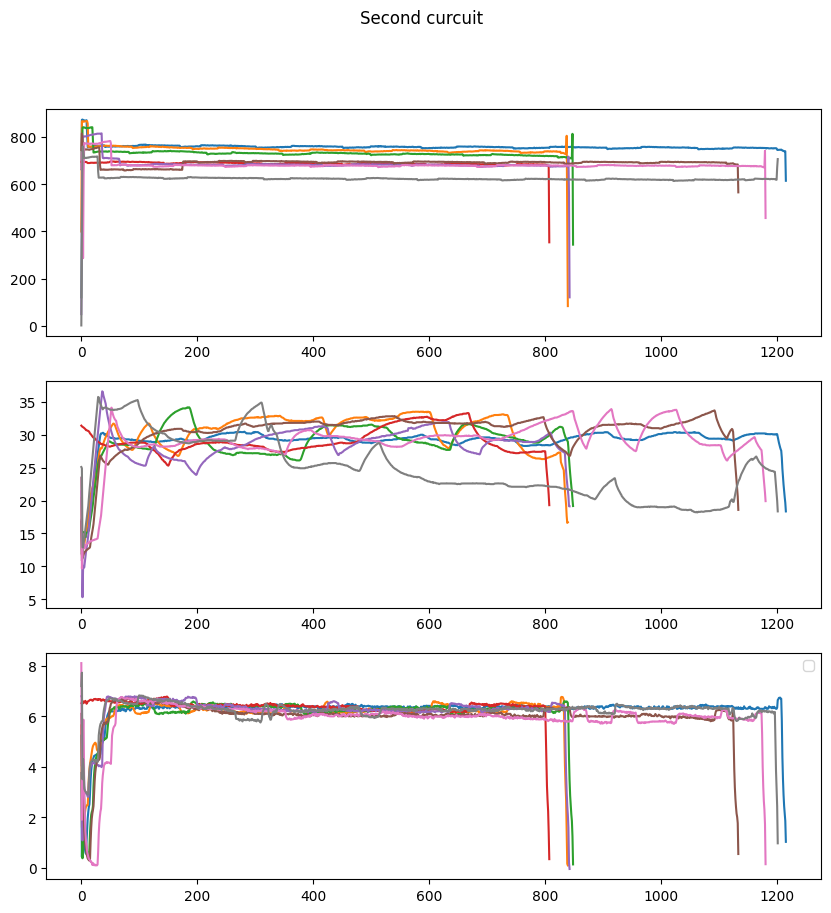

In [9]:
fig, axs = plt.subplots(3, 1, figsize=(10.0,10.0))
time_shift = 60
fig.suptitle('Second curcuit')
for k,v in periods.items():
    axs[0].plot(np.arange(0, len(v), 1), v[481], label=k)
    axs[1].plot(np.arange(0, len(v), 1), v[319])
    axs[2].plot(np.arange(0, len(v), 1), v[319]-v[317])
    print(k, v[481].mean())
    print(k, (v[319] - v[317]).mean())
plt.legend()
# plt.xticks(rotation=90)

### From plots above we can see that the time periods that are corresponds with reactor startup and shutdown have significant effect on mean values
### To make sure that reactor startup and shutdown periods do not mess the weekly data up one of the best option is to drop data with high bias

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


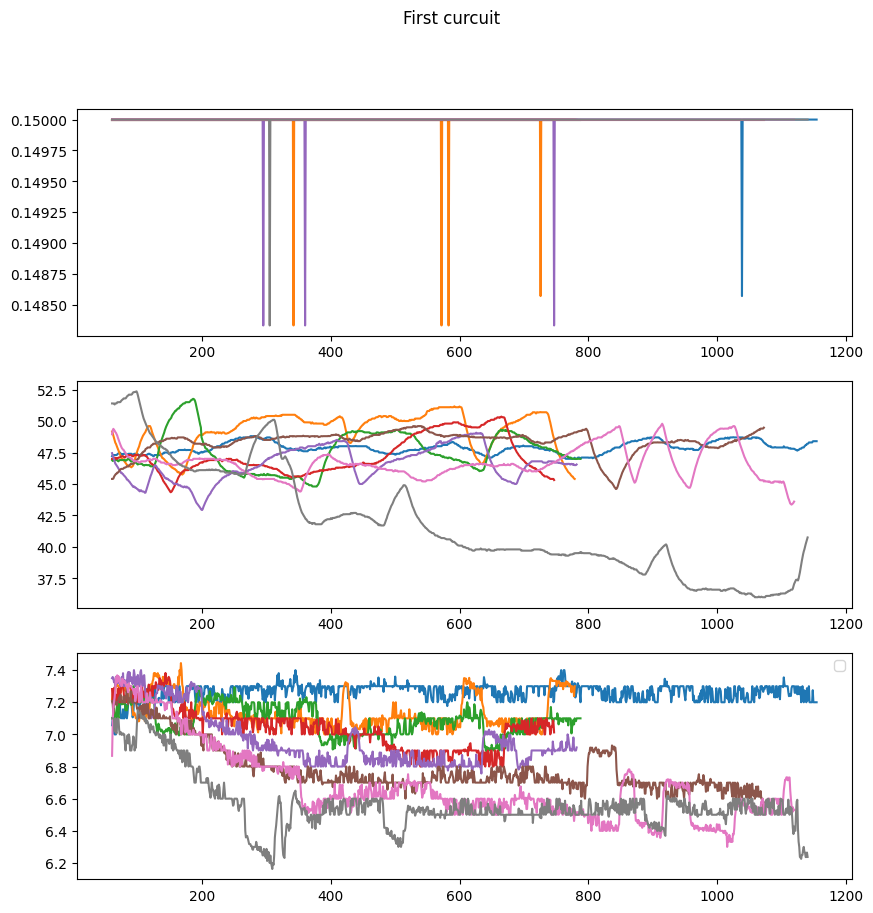

In [10]:
# filtering of data (drop) by deviation from mean value or just drop 3 hours at the beggining and end
fig, axs = plt.subplots(3, 1, figsize=(10.0,10.0))
time_shift = 60
fig.suptitle('First curcuit')
for k,v in periods.items():
    axs[0].plot(np.arange(time_shift, len(v)-time_shift, 1), v[307][time_shift:-time_shift], label=k)
    axs[1].plot(np.arange(time_shift, len(v)-time_shift, 1), v[315][time_shift:-time_shift])
    axs[2].plot(np.arange(time_shift, len(v)-time_shift, 1), v[315][time_shift:-time_shift]
                -v[299][time_shift:-time_shift])
plt.legend()
# plt.xticks(rotation=90)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


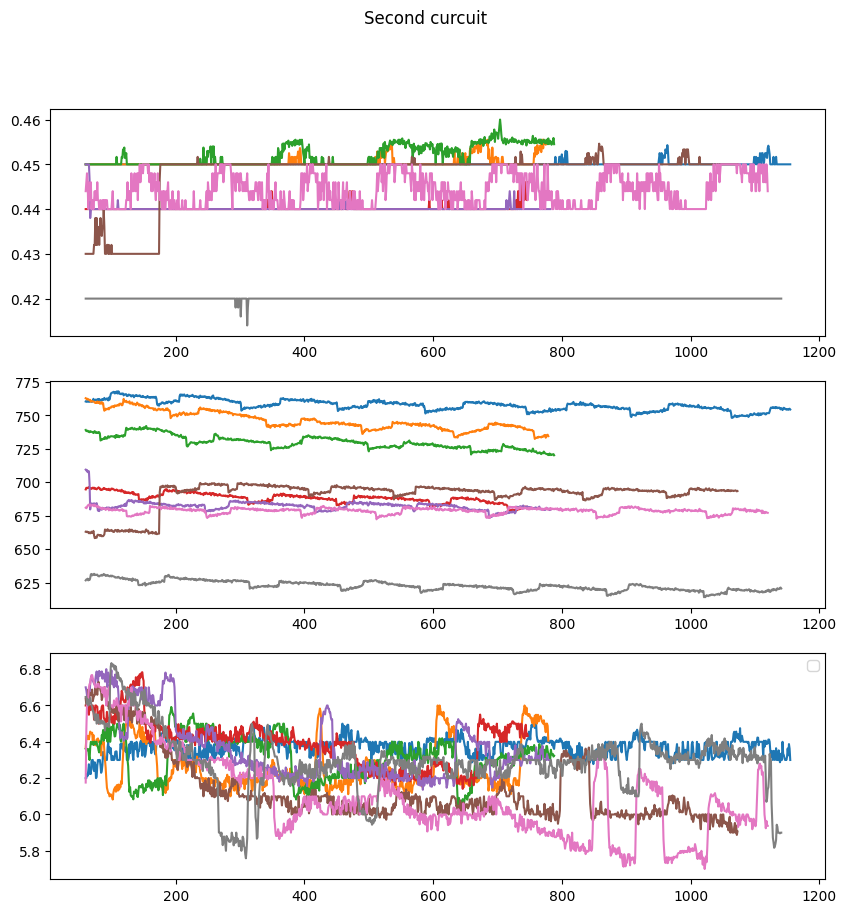

In [11]:
# filtering of data (drop) by deviation from mean value or just drop 3 hours at the beggining and end
fig, axs = plt.subplots(3, 1, figsize=(10.0,10.0))
time_shift = 60
fig.suptitle('Second curcuit')
for k,v in periods.items():
    axs[0].plot(np.arange(time_shift, len(v)-time_shift, 1), v[309][time_shift:-time_shift], label=k)
    axs[1].plot(np.arange(time_shift, len(v)-time_shift, 1), v[481][time_shift:-time_shift])
    axs[2].plot(np.arange(time_shift, len(v)-time_shift, 1), v[319][time_shift:-time_shift]
                -v[317][time_shift:-time_shift])
plt.legend()
# plt.xticks(rotation=90)

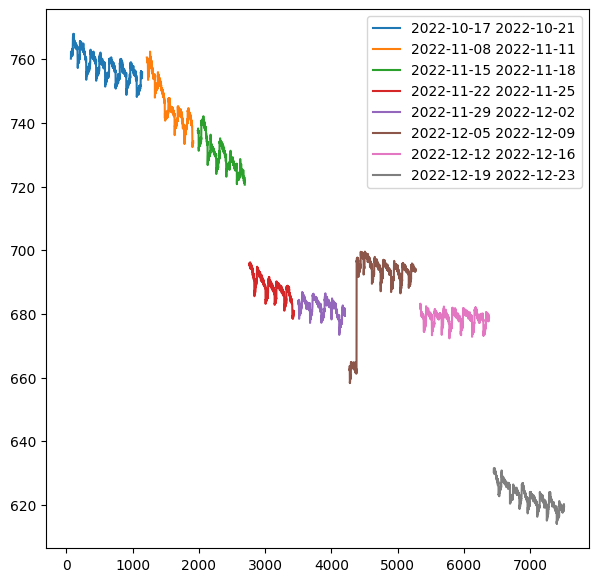

In [12]:
# visualization of sequantial reactor on power operation
step = 0
time_shift = 70
plt.figure(figsize=(7,7))
for k,v in periods.items():
    plt.plot(np.arange(time_shift + step, len(v) - time_shift + step, 1), v[481][time_shift:-time_shift], label=k)
    step += len(v) - time_shift
plt.legend()

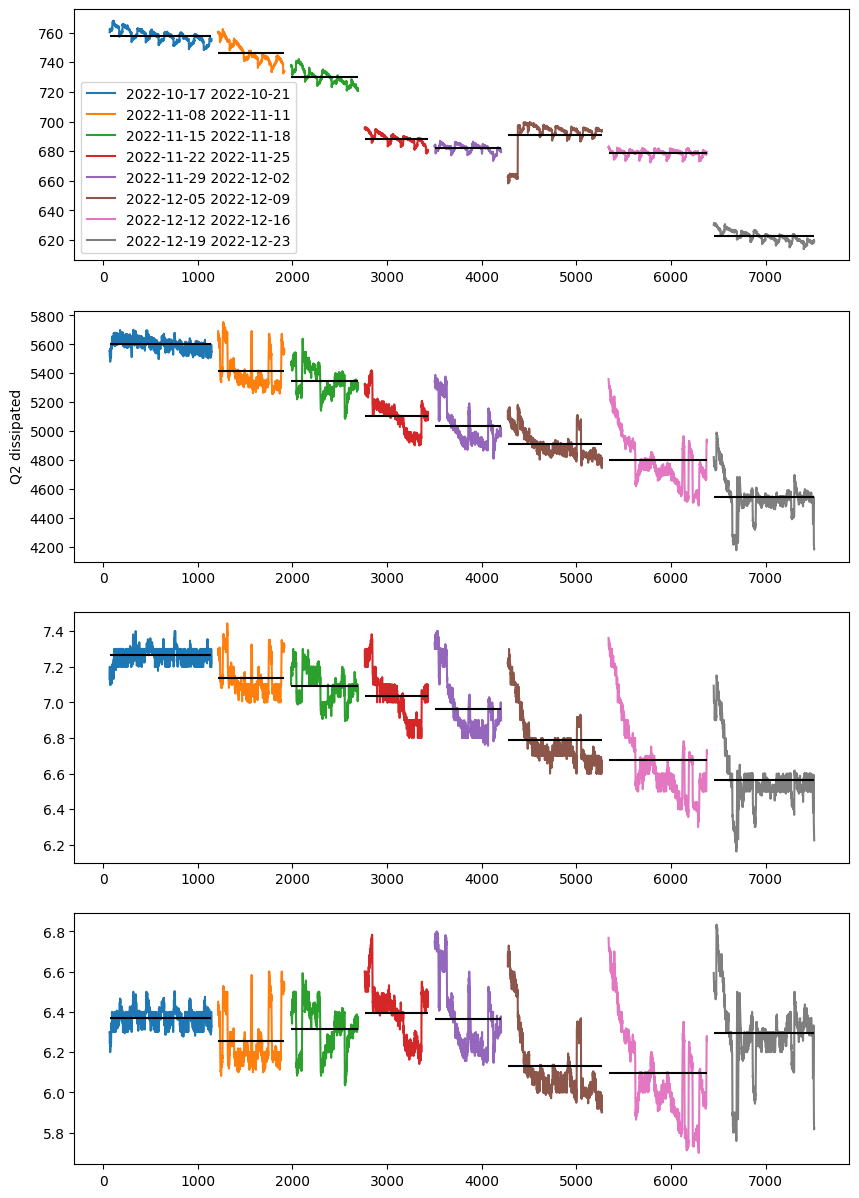

<Figure size 700x700 with 0 Axes>

In [13]:
# visualization of sequantial reactor on power operation
fig, axs = plt.subplots(4,1, figsize=(10,15))
step = 0
time_shift = 70
plt.figure(figsize=(7,7))
for k,v in periods.items():
    hlines = np.arange(time_shift + step, len(v) - time_shift + step, 1)
    axs[0].plot(np.arange(time_shift + step, len(v) - time_shift + step, 1), v[481][time_shift:-time_shift], label=k)
    axs[1].set_ylabel("Volumetric flow rate")
    mean_flow = v[481][time_shift:-time_shift].mean()
    axs[0].hlines(mean_flow, hlines[0], hlines[-1], color="black")
    # Power dissipated in 2nd ciruit
    axs[1].plot(np.arange(time_shift + step, len(v) - time_shift + step, 1), 
                1.16*v[481][time_shift:-time_shift]*(v[319][time_shift:-time_shift]-v[317][time_shift:-time_shift]))
    axs[1].set_ylabel("Q2 dissipated")
    mean_2nd_pwd = (1.16*v[481][time_shift:-time_shift]*(v[319][time_shift:-time_shift]-v[317][time_shift:-time_shift])).mean()
    axs[1].hlines(mean_2nd_pwd, hlines[0], hlines[-1], color="black")
    # 1st circuit delta t
    axs[2].plot(np.arange(time_shift + step, len(v) - time_shift + step, 1), v[315][time_shift:-time_shift]-v[299][time_shift:-time_shift])
    mean_1st = (v[315][time_shift:-time_shift]-v[299][time_shift:-time_shift]).mean()
    axs[2].hlines(mean_1st, hlines[0], hlines[-1], color="black")
    # 2nd circuit delta t
    axs[3].plot(np.arange(time_shift + step, len(v) - time_shift + step, 1), v[319][time_shift:-time_shift]-v[317][time_shift:-time_shift] )
    mean_2nd = (v[319][time_shift:-time_shift]-v[317][time_shift:-time_shift]).mean()
    axs[3].hlines(mean_2nd, hlines[0], hlines[-1], color="black")
    step += len(v) - time_shift
    axs[0].legend()
fig.savefig("pwd_data_0.png")

## Highlights from figs above
### Significant changes in Q2 and temperatures in 1st, 2nd loop might be caused by:
* I of 2nd loop pumps
* number of pumps that are under operation (I are different)
* colling Tower fans under operation
* cooling tower water make-up

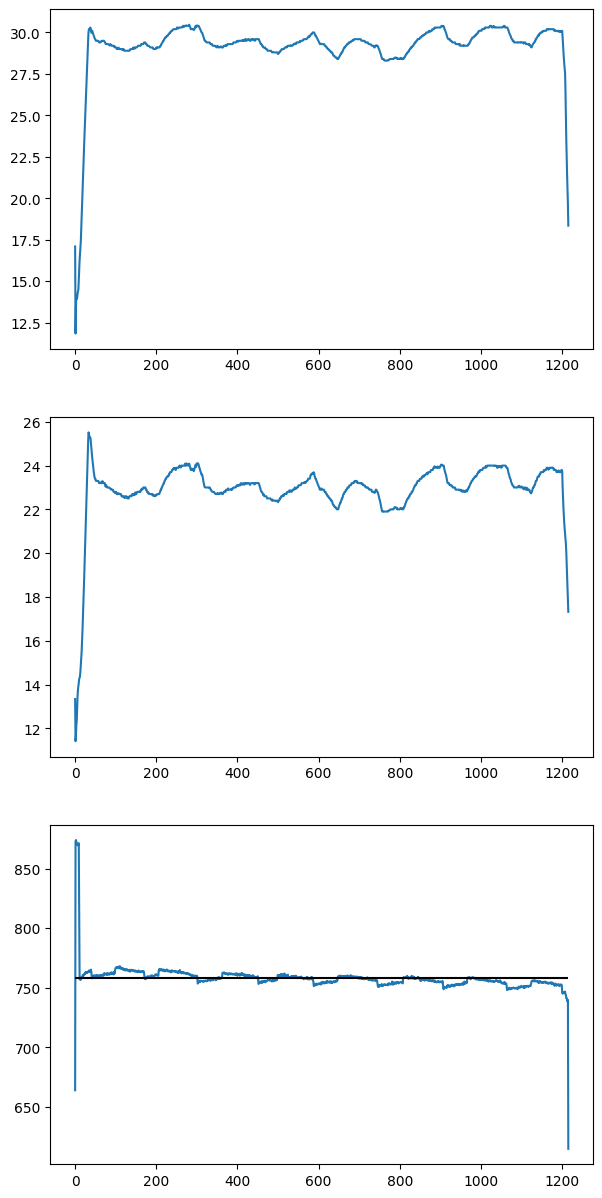

In [14]:
fig, axs = plt.subplots(3,1, figsize=(7,15))
step = 0
df_first_period = periods[list(periods.keys())[0]]
hlines_full = np.arange(0, len(df_first_period), 1)
# 2nd circuit t after HE
axs[0].plot(np.arange(0, len(df_first_period), 1), df_first_period[319])
axs[1].plot(np.arange(0, len(df_first_period), 1), df_first_period[317])
axs[2].plot(np.arange(0, len(df_first_period), 1), df_first_period[481])
mean_2nd_Q = df_first_period[481].mean()
axs[2].hlines(mean_2nd_Q, hlines_full[0], hlines_full[-1], color="black")

In [15]:
# std.dev let us to exclude some values
# upon from mean deviation results we can conclude that flow rate has changed
# set a limit on from mean deviation to drop data from df
mean_dev_Q2 = 10 # unique for each parameter
wfr_anl = WaterFlowRates(mean_dev_Q2)
df_fp_Q2_less, df_fp_Q2_more = wfr_anl.df_md_filter(df_first_period, 481)
mean_2nd_Q_less = df_fp_Q2_less[481].mean()
mean_2nd_Q, mean_2nd_Q_less, len(df_fp_Q2_less)

(758.2144153815193, 757.7077891917389, 1187)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

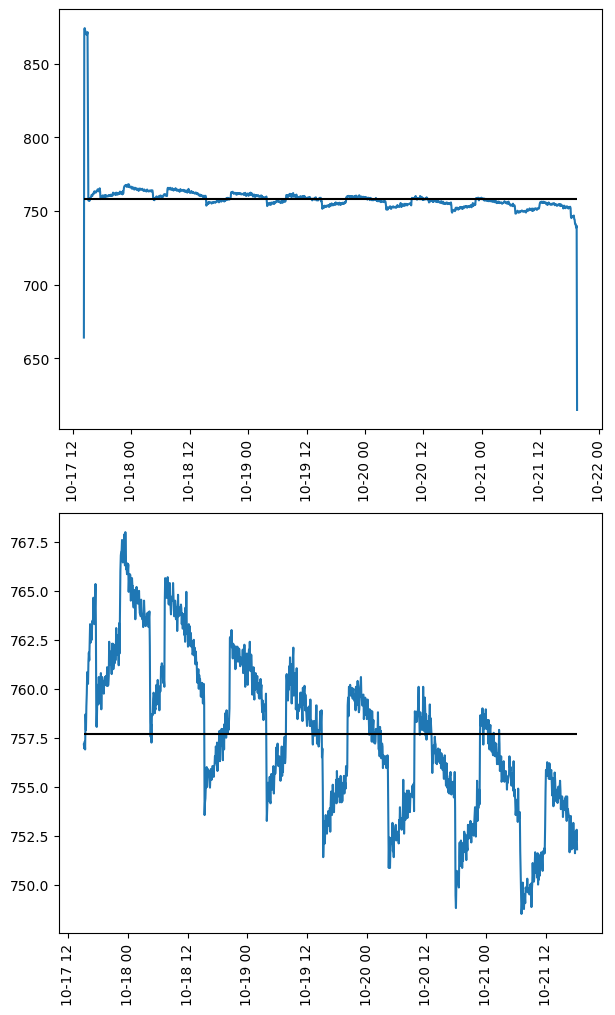

In [16]:
# theory visualization
# better filter by temperature to drop timestamps where water is heating
fig, axs = plt.subplots(2,1, figsize=(7,12))
axs[0].plot(df_first_period[481])
axs[0].hlines(mean_2nd_Q, df_first_period.index[0], df_first_period.index[-1], color="black")
axs[1].plot(df_fp_Q2_less[481])
axs[1].hlines(mean_2nd_Q_less, df_fp_Q2_less.index[0], df_fp_Q2_less.index[-1], color="black")
plt.setp(axs[0].get_xticklabels(), rotation=90)
plt.setp(axs[1].get_xticklabels(), rotation=90)

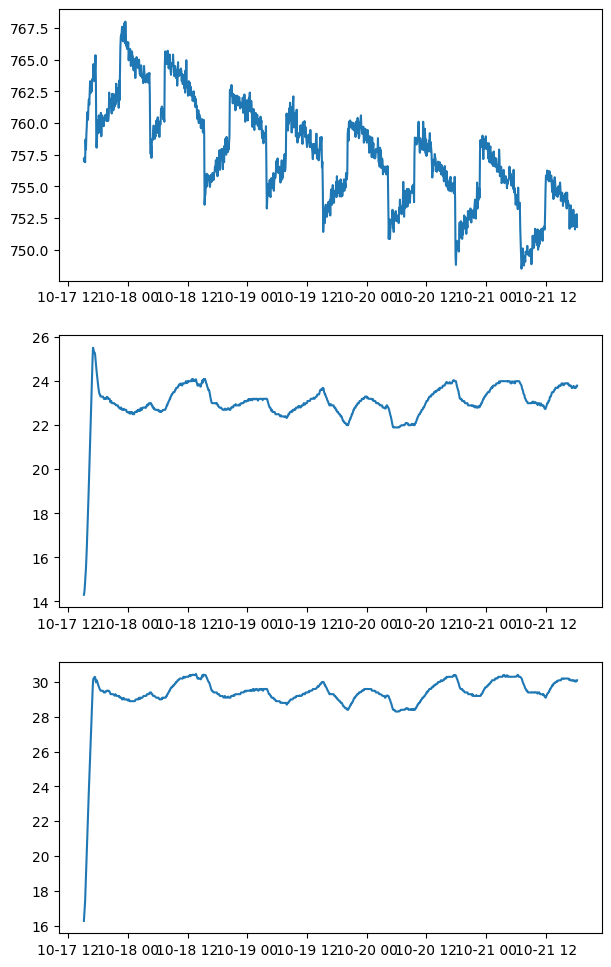

In [17]:
# visualization Q2 and 2nd loop temps after filtering
# rapid temperature increase caused by water heating in heat exchanger
fig, axs = plt.subplots(3,1, figsize=(7,12))
axs[0].plot(df_fp_Q2_less[481])
axs[1].plot(df_fp_Q2_less[317])
axs[2].plot(df_fp_Q2_less[319])

In [18]:
# on figs above it's seen that temperature rising due to water heating. The last affects on mean values and overall data
mean_dev_temps = 1.5
wt = WaterTemperatures(mean_dev_temps)
df_fp_temp_less, df_fp_temp_more = wt.df_md_filter(df_first_period, 317)
mean_2nd_temp_less = df_fp_temp_less[317].mean()
mean_2nd_temp_less, len(df_fp_temp_less)

(23.101936158394675, 1167)

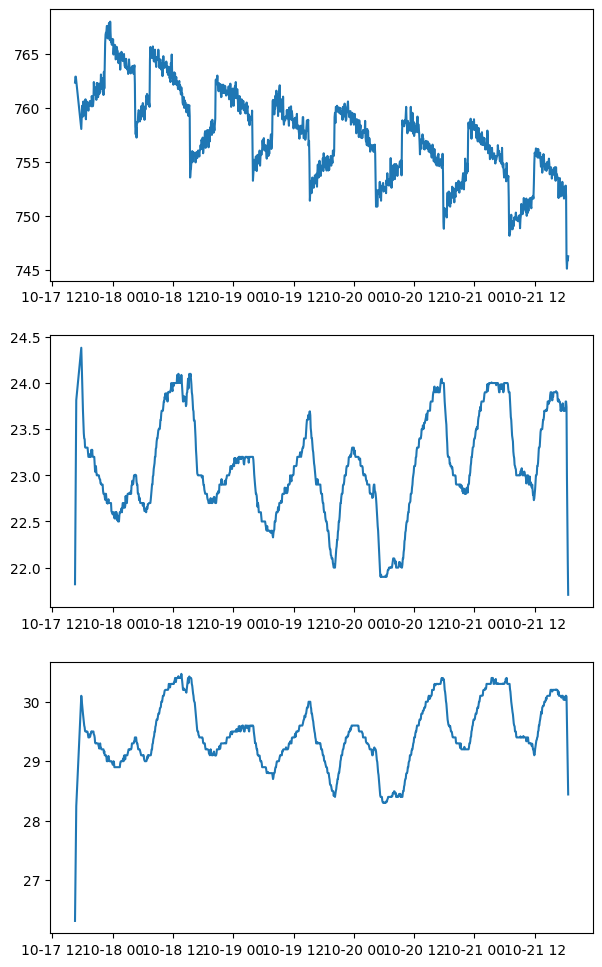

In [19]:
# visualization Q2 and 2nd loop temps after filtering
# filtered by temperatures instead of Q2
fig, axs = plt.subplots(3,1, figsize=(7,12))
axs[0].plot(df_fp_temp_less[481])
axs[1].plot(df_fp_temp_less[317])
axs[2].plot(df_fp_temp_less[319])

## Some analytics on filtered period (2022-10-17 2022-10-21)

In [20]:
# linear_fit Q2
X_temps = np.arange(0, len(df_fp_temp_less), 1).reshape(-1,1)
Q2_temps = df_fp_temp_less[481].to_numpy().reshape(-1,1)
Q2_lrm = wt.lin_regression_fit(X_temps, Q2_temps)

In [21]:
Q2_predicted = Q2_lrm.predict(X_temps)
Q2_lrm.score(X_temps, Q2_temps)

0.5921908546861916

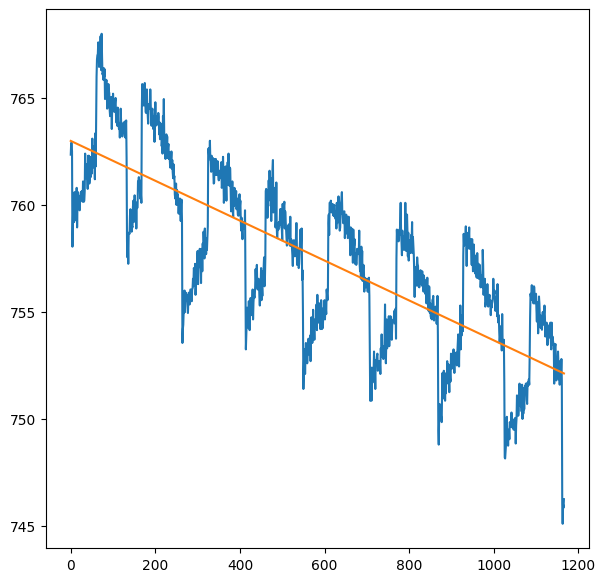

In [22]:
fig, axs = plt.subplots(figsize=(7,7))
axs.plot(X_temps, df_fp_temp_less[481])
axs.plot(X_temps, Q2_predicted)

In [23]:
#try SMA
window_size = 5*12 # 1 hour window
windows = df_fp_temp_less.rolling(window_size)
moving_aver = windows.mean().dropna()

In [24]:
# df_fp_temp_less data grouped by 1 hour freq 
df_fp_tl_1h = df_fp_temp_less.groupby(pd.Grouper(freq="60min")).mean()

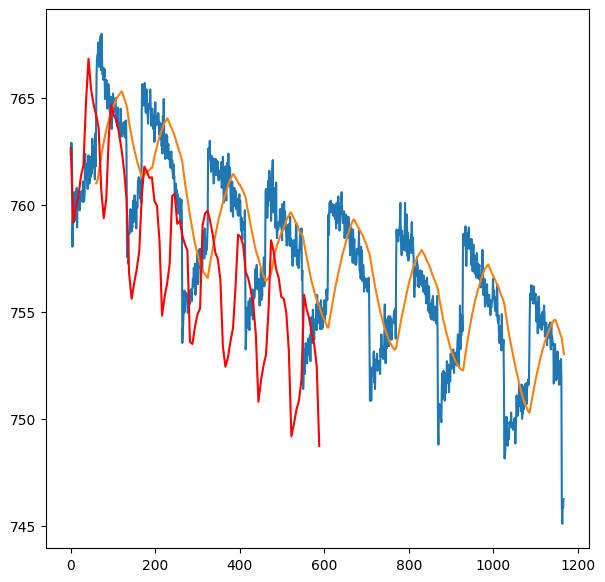

In [25]:
# 5 min, 60 min grouped data and sma with window_size
# it is just a quickview
fig, axs = plt.subplots(figsize=(7,7))
axs.plot(X_temps, df_fp_temp_less[481])
axs.plot(np.arange(5*12, len(moving_aver)+5*12, 1), moving_aver[481])
axs.plot(np.arange(0, len(df_fp_tl_1h)*6, 6), df_fp_tl_1h[481], color="red")

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

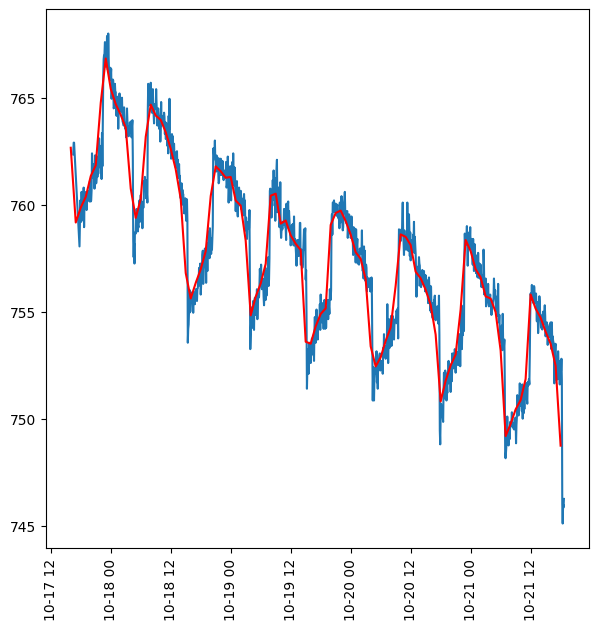

In [26]:
# 5 min, 60 min grouped data and sma with window_size
# 60 min grouping makes data much smooth
fig, axs = plt.subplots(figsize=(7,7))
axs.plot(df_fp_temp_less[481])
axs.plot(df_fp_tl_1h[481], color="red")
plt.setp(axs.get_xticklabels(), rotation=90)

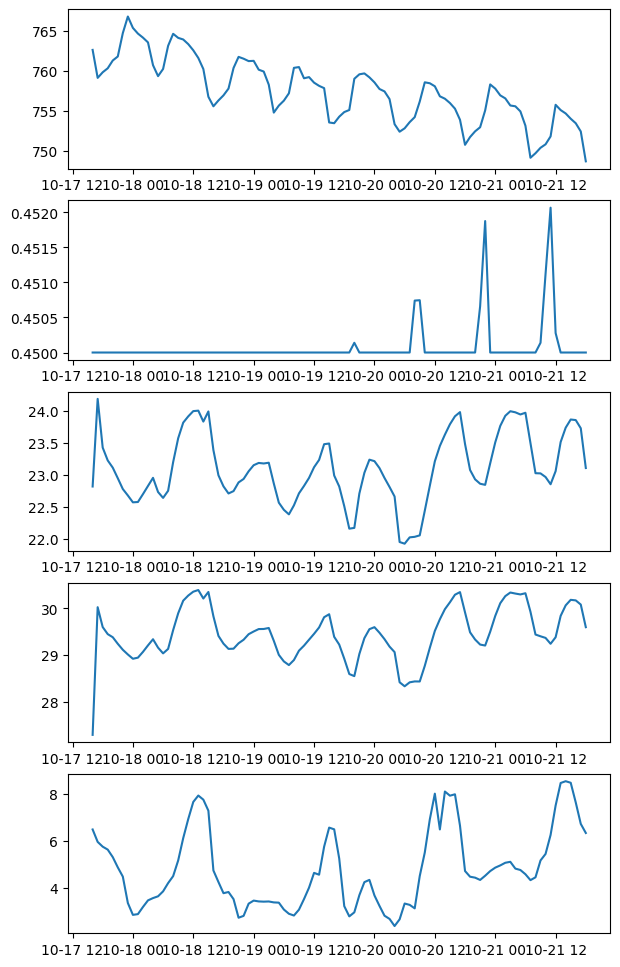

In [27]:
# will this peaks correlate with each other?
# how is about to check pressure in 2nd loop?
# the pressure in incresed at the end of week, but the magnitude is not much
# also air temperature may affects on temperatures 
fig, axs = plt.subplots(5,1, figsize=(7,12))
axs[0].plot(df_fp_tl_1h[481])
axs[1].plot(df_fp_tl_1h[309])
axs[2].plot(df_fp_tl_1h[317])
axs[3].plot(df_fp_tl_1h[319])
axs[4].plot(df_fp_tl_1h[327])

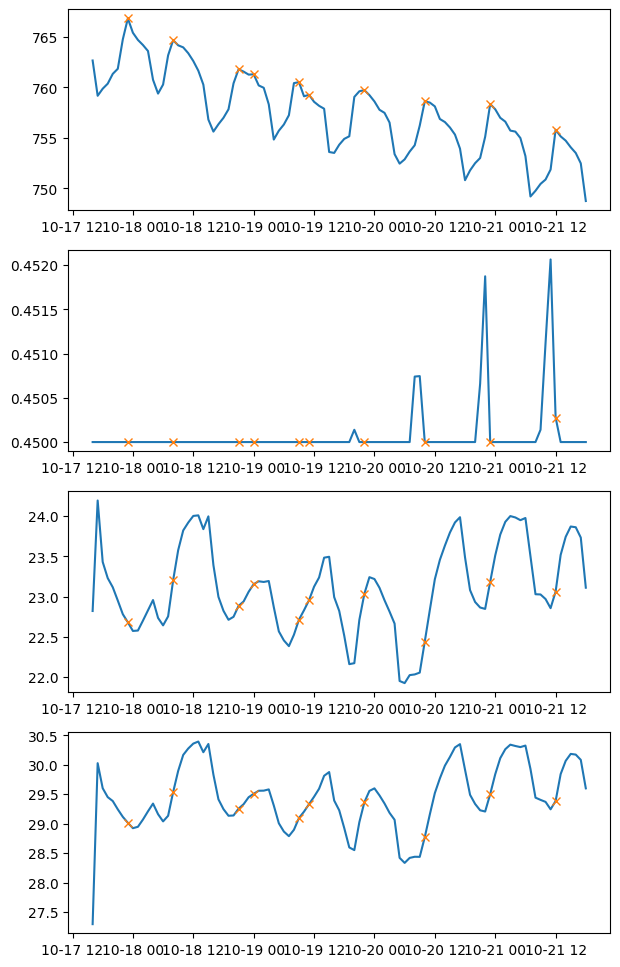

In [28]:
# determination of period or peaks might be useful to drop confusing data (cooling tower water make-up)
# the max value of flow rate is near to min value of pressure (that's ok)
from scipy.signal import find_peaks
Q2_peaks, props = find_peaks(df_fp_tl_1h[481])

fig, axs = plt.subplots(4,1, figsize=(7,12))
axs[0].plot(df_fp_tl_1h[481])
axs[0].plot(df_fp_tl_1h.iloc[Q2_peaks][481], "x")
axs[1].plot(df_fp_tl_1h[309])
axs[1].plot(df_fp_tl_1h.iloc[Q2_peaks][309], "x")
axs[2].plot(df_fp_tl_1h[317])
axs[2].plot(df_fp_tl_1h.iloc[Q2_peaks][317], "x")
axs[3].plot(df_fp_tl_1h[319])
axs[3].plot(df_fp_tl_1h.iloc[Q2_peaks][319], "x")


In [29]:
# apply lrm on peaks to find best fitting curve
X_clear = Q2_peaks.reshape(-1,1)
Q2_1h_clear = df_fp_tl_1h.iloc[Q2_peaks][481].to_numpy().reshape(-1,1)
Q2_clear_lrm = wt.lin_regression_fit(X_clear, Q2_1h_clear)

In [30]:
# compare with what we got before it's seen that lrm accurancy now is 90%
Q2_clear_lrm.score(X_clear, Q2_1h_clear), Q2_lrm.score(X_temps, Q2_temps), Q2_clear_lrm.predict(X_clear)

(0.8836456338181984,
 0.5921908546861916,
 array([[764.99786958],
        [764.00042707],
        [762.55967677],
        [762.22719593],
        [761.22975342],
        [761.00809953],
        [759.78900313],
        [758.45907978],
        [757.01832949],
        [755.57757919]]))

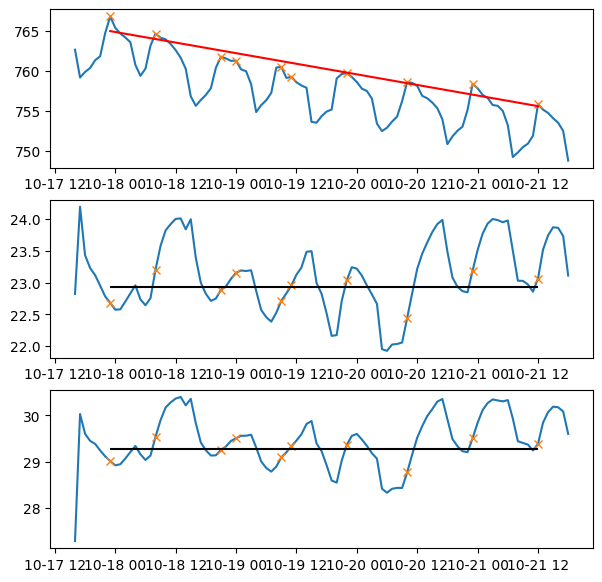

In [31]:
# apply mean function on 317 and 319 ids to get new mean values of temperatures
# restricting data by peaks we supress unwanted data changes
df_peaks = df_fp_tl_1h.iloc[Q2_peaks]
fig, axs = plt.subplots(3,1, figsize=(7,7))
axs[0].plot(df_fp_tl_1h[481])
axs[0].plot(df_fp_tl_1h.iloc[Q2_peaks][481], "x")
axs[0].plot(df_peaks.index, Q2_clear_lrm.predict(X_clear), color="red")
axs[1].plot(df_fp_tl_1h[317])
axs[1].plot(df_fp_tl_1h.iloc[Q2_peaks][317], "x")
axs[1].hlines(df_peaks[317].mean(), df_peaks.index[0], df_peaks.index[-1], color="black")
axs[2].plot(df_fp_tl_1h[319])
axs[2].plot(df_fp_tl_1h.iloc[Q2_peaks][319], "x")
axs[2].hlines(df_peaks[319].mean(), df_peaks.index[0], df_peaks.index[-1], color="black")


In [32]:
# to exclude effects of CT fans on temperatures consider how CT fans I changes along of first period
# 381 Iвг1, 395 Iвг2, 396 Iвг3
# it's quite obvious but all 3 I's cannot be used in a single df even after grouping
# they are not operated synchronously
ids_ctfan = df_refactorer.select_by_ids([381, 395, 396])

In [33]:
# create 3 independent dfs
ctfan_1 = df_refactorer.select_by_ids([381])
ctfan_2 = df_refactorer.select_by_ids([395])
ctfan_3 = df_refactorer.select_by_ids([396])
ctfan_1

[                          ID     Value
 Timestamp                             
 2022-10-04 10:55:33.223  381  0.021632
 2022-10-04 11:03:39.679  381  2.110348
 2022-10-04 11:12:18.352  381  0.597579
 2022-10-04 14:05:05.544  381  0.056781
 2022-10-04 15:06:42.355  381  1.473598
 ...                      ...       ...
 2022-12-23 21:42:16.279  381  2.063128
 2022-12-23 21:50:23.880  381  2.069881
 2022-12-23 22:41:10.615  381  0.089227
 2022-12-23 22:57:55.394  381  0.089227
 2022-12-23 22:58:05.394  381  2.391668
 
 [48092 rows x 2 columns]]

In [34]:
# groupby 1 hour
ctfan_1_1hour = df_refactorer.min_frac_groupby(60, *ctfan_1)
ctfan_2_1hour = df_refactorer.min_frac_groupby(60, *ctfan_2)
ctfan_3_1hour = df_refactorer.min_frac_groupby(60, *ctfan_3)

In [35]:
ctfan_1 = df_refactorer.create_df_from_dfs("ID", ctfan_1_1hour)
ctfan_2 = df_refactorer.create_df_from_dfs("ID", ctfan_2_1hour)
ctfan_3 = df_refactorer.create_df_from_dfs("ID", ctfan_3_1hour)

In [36]:
# select time periods
print(time_periods)
ctf_1_periods = df_refactorer.select_time_period(ctfan_1, time_periods)
ctf_2_periods = df_refactorer.select_time_period(ctfan_2, time_periods)
ctf_3_periods = df_refactorer.select_time_period(ctfan_3, time_periods)

[('2022-10-17', '2022-10-21'), ('2022-11-08', '2022-11-11'), ('2022-11-15', '2022-11-18'), ('2022-11-22', '2022-11-25'), ('2022-11-29', '2022-12-02'), ('2022-12-05', '2022-12-09'), ('2022-12-12', '2022-12-16'), ('2022-12-19', '2022-12-23')]


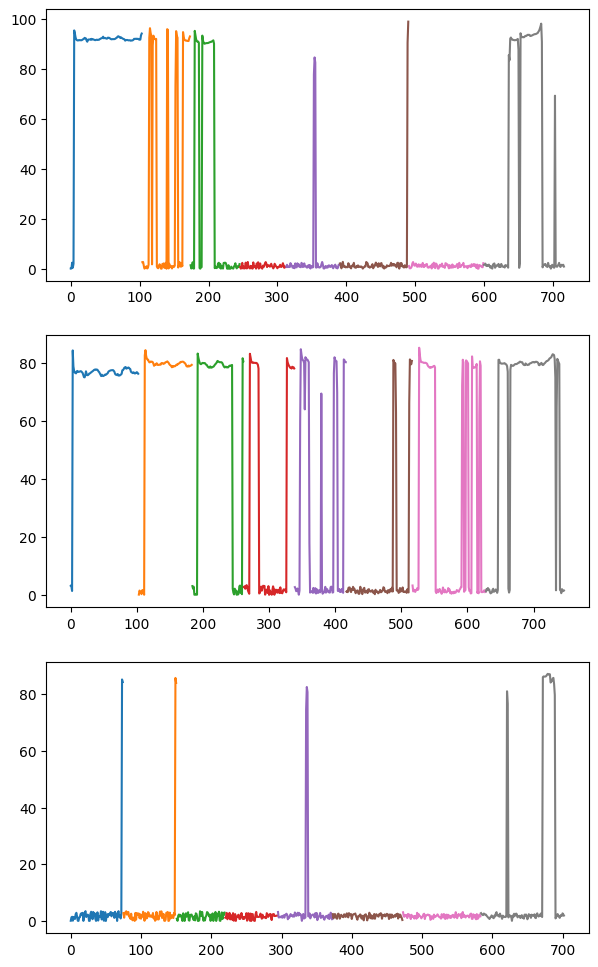

In [37]:
# visualize ctf data
# fan #3 is almost never in use
# fan #1 is in use much more often
# fan #2 is absolute leader
fig, axs = plt.subplots(3,1, figsize=(7,12))
step_fans = 0
for k,v in ctf_1_periods.items():
    axs[0].plot(np.arange(0+step_fans, len(v[381])+step_fans, 1), v[381], label=k)
    step_fans += len(v[381])
step_fans = 0

for k,v in ctf_2_periods.items():
    axs[1].plot(np.arange(0+step_fans, len(v[395])+step_fans, 1), v[395], label=k)
    step_fans += len(v[395])
step_fans = 0

for k,v in ctf_3_periods.items():
    axs[2].plot(np.arange(0+step_fans, len(v[396])+step_fans, 1), v[396], label=k)
    step_fans += len(v[396])

In [38]:
# select only first period for 1st and 2nd fans
ctf_1_fp = ctf_1_periods[list(ctf_1_periods.keys())[0]]
ctf_2_fp = ctf_2_periods[list(ctf_2_periods.keys())[0]]

In [39]:
# select rows according to df_fp_tl_1h dataframe which is already filtered by mean deviation
ctf_1_fp = ctf_1_fp.loc[df_fp_tl_1h.index]
ctf_2_fp = ctf_2_fp.loc[df_fp_tl_1h.index]

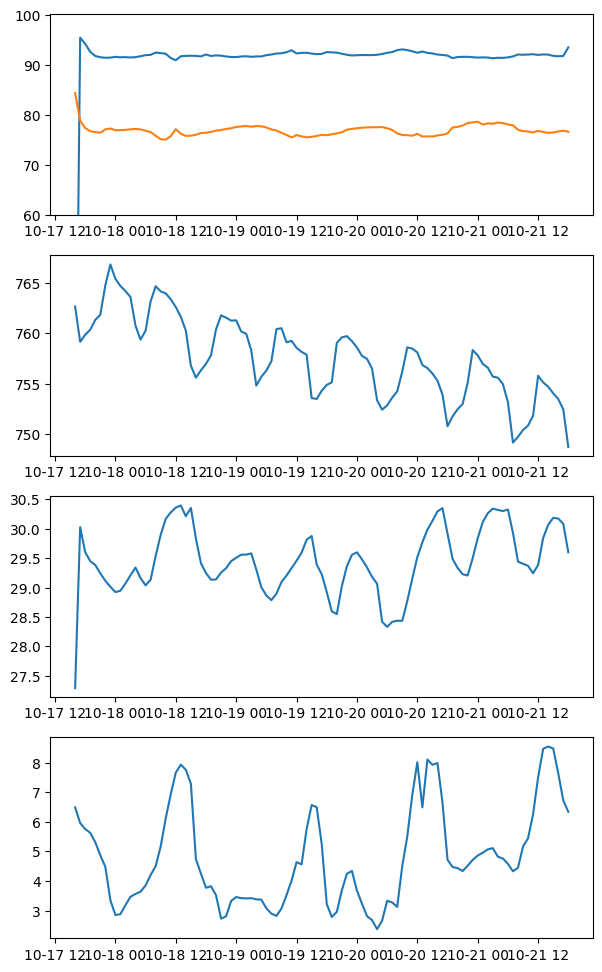

In [40]:
# plot Q2, temperature of 2nd loop coolant, I ctfs
# ctfs were in use for the whole onpower week, so there are no any effects on temperatures
#
fig, axs = plt.subplots(4,1, figsize=(7,12))
axs[0].plot(ctf_1_fp)
axs[0].plot(ctf_2_fp)
axs[0].set_ylim(60)
axs[1].plot(df_fp_tl_1h[481])
axs[2].plot(df_fp_tl_1h[319])
axs[3].plot(df_fp_tl_1h[327])

In [41]:
# lets also take a look on 2nd loop pumps current
path_i_pumps = os.path.join(os.path.abspath(""), "I_pumps_200921_to_231222.csv")
df_refactor_pumps = CsvRefactorer.read_csv(path_i_pumps, quickclean=True, index_range=("20221004","20221223"))

In [42]:
df_pumps_unique_ids = np.sort(df_refactor_pumps.df["ID"].unique())
df_pumps_unique_ids

array([402, 403, 404, 405, 406, 407, 408, 409, 410, 411])

### Second loop pumps id
* 406 2-1
* 407 2-2
* 408 2-3
* 409 2-4

In [43]:
df_ids_pumps = df_refactor_pumps.select_by_ids({406,407,408,409})

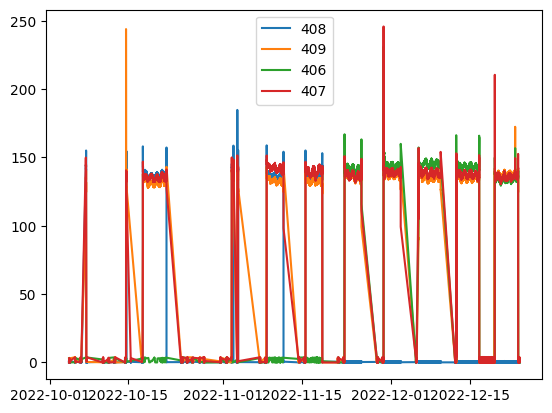

In [44]:
# I of pumps is in range of <130-150>
for i in df_ids_pumps:
    plt.plot(i["Value"], label=i["ID"][0])
plt.legend()

In [47]:
# grouped by 60 min
df_pumps_grouped = df_refactor_pumps.min_frac_groupby("60", *df_ids_pumps)

In [48]:
df_pumps = df_refactor_pumps.create_df_from_dfs("ID", df_pumps_grouped).dropna()

In [49]:
df_pumps_periods = df_refactor_pumps.select_time_period(df_pumps, time_periods)

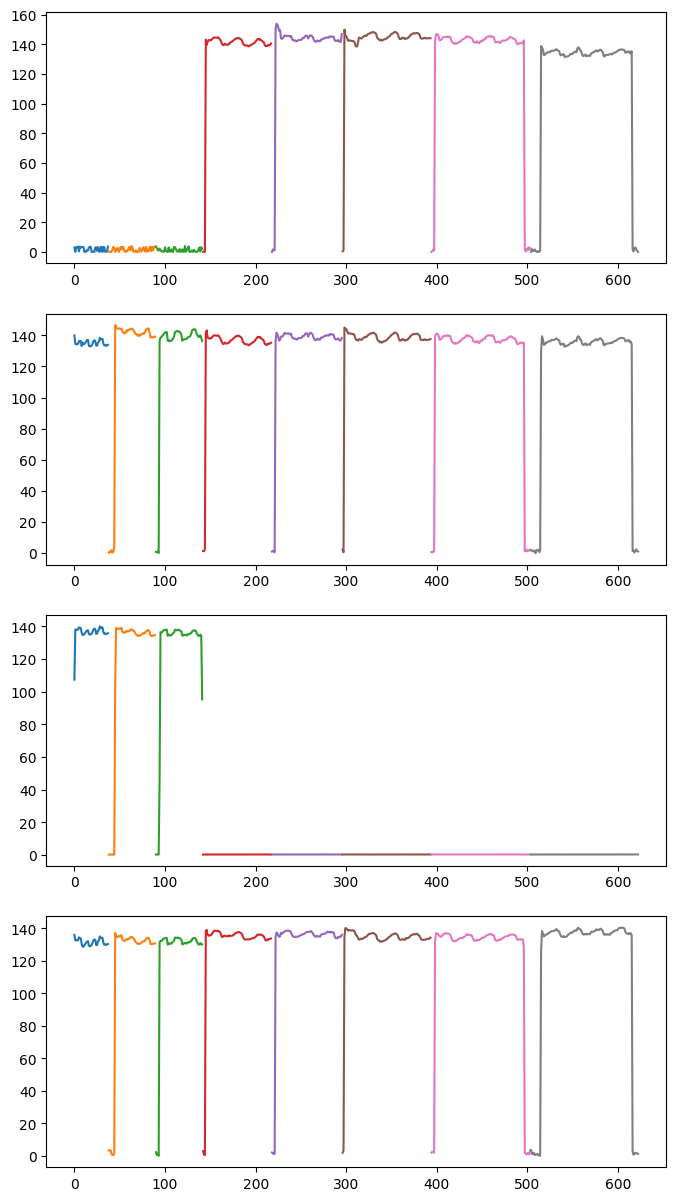

In [50]:
# each I pump on unique subplot
fig, axs = plt.subplots(4,1, figsize=(8,15))
step_pumps = 0
for k,v in df_pumps_periods.items():
    axs[0].plot(np.arange(0+step_pumps, len(v)+step_pumps, 1), v[406], label=k)
    axs[1].plot(np.arange(0+step_pumps, len(v)+step_pumps, 1), v[407])
    axs[2].plot(np.arange(0+step_pumps, len(v)+step_pumps, 1), v[408])
    axs[3].plot(np.arange(0+step_pumps, len(v)+step_pumps, 1), v[409])
    step_pumps += len(v)

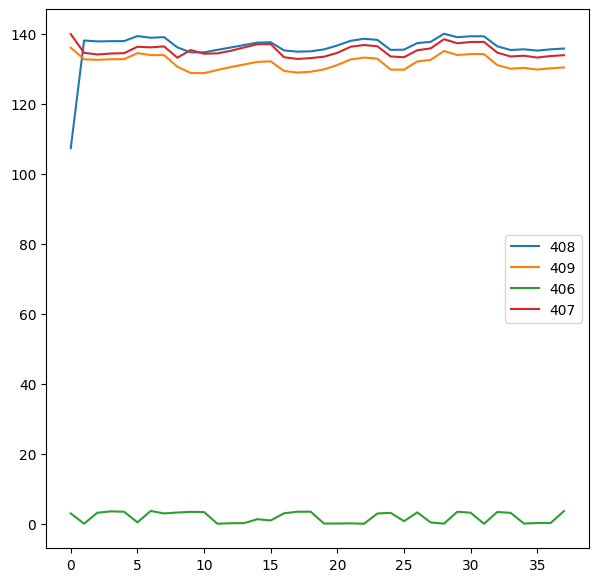

In [51]:
# consider fisrt period
# each I pump on unique subplot
df_pumps_fp = df_pumps_periods[list(df_pumps_periods.keys())[0]]
fig, axs = plt.subplots(1,1, figsize=(7,7))
step_pumps = 0
axs.plot(np.arange(0, len(df_pumps_fp), 1), df_pumps_fp, label=df_pumps_fp.columns)
step_pumps += len(v)
plt.legend()

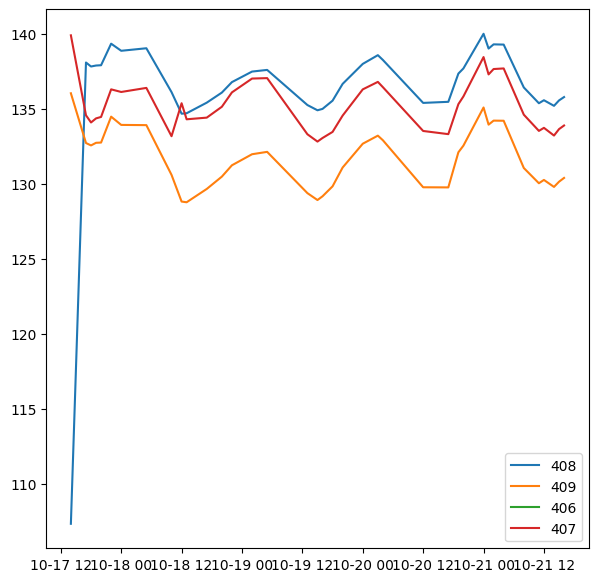

In [52]:
# only pumps under operation
# rude fileter just for quickview and drop unoperated pumps
df_pumps_fp_oper = df_pumps_fp[df_pumps_fp > 100]
fig, axs = plt.subplots(1,1, figsize=(7,7))
step_pumps = 0
axs.plot(df_pumps_fp_oper, label=df_pumps_fp_oper.columns)
step_pumps += len(v)
plt.legend()

In [53]:
pm = PumpsCurrents(10)
df_pumps_fp_oper_ls, df_pumps_fp_oper_mr = pm.df_md_filter(df_pumps_fp_oper, 408)

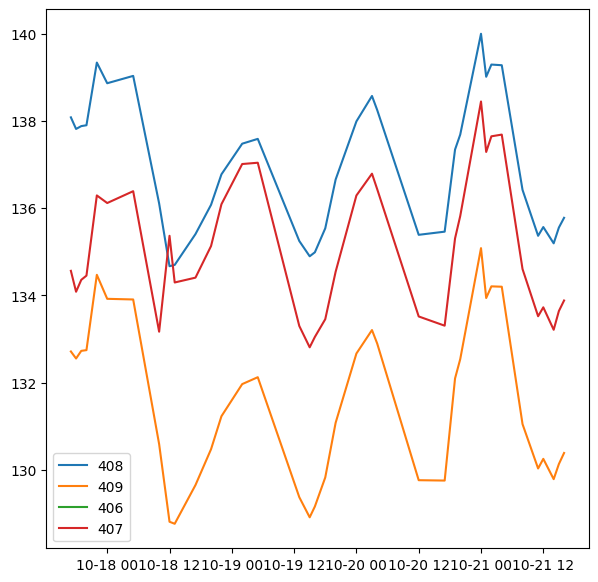

In [54]:
# only pumps under operation
# filtered by md
# the pumps I change synchronously
fig, axs = plt.subplots(1,1, figsize=(7,7))
step_pumps = 0
axs.plot(df_pumps_fp_oper_ls, label=df_pumps_fp_oper_ls.columns)
step_pumps += len(v)
plt.legend()

Text(0, 0.5, 'Temperature')

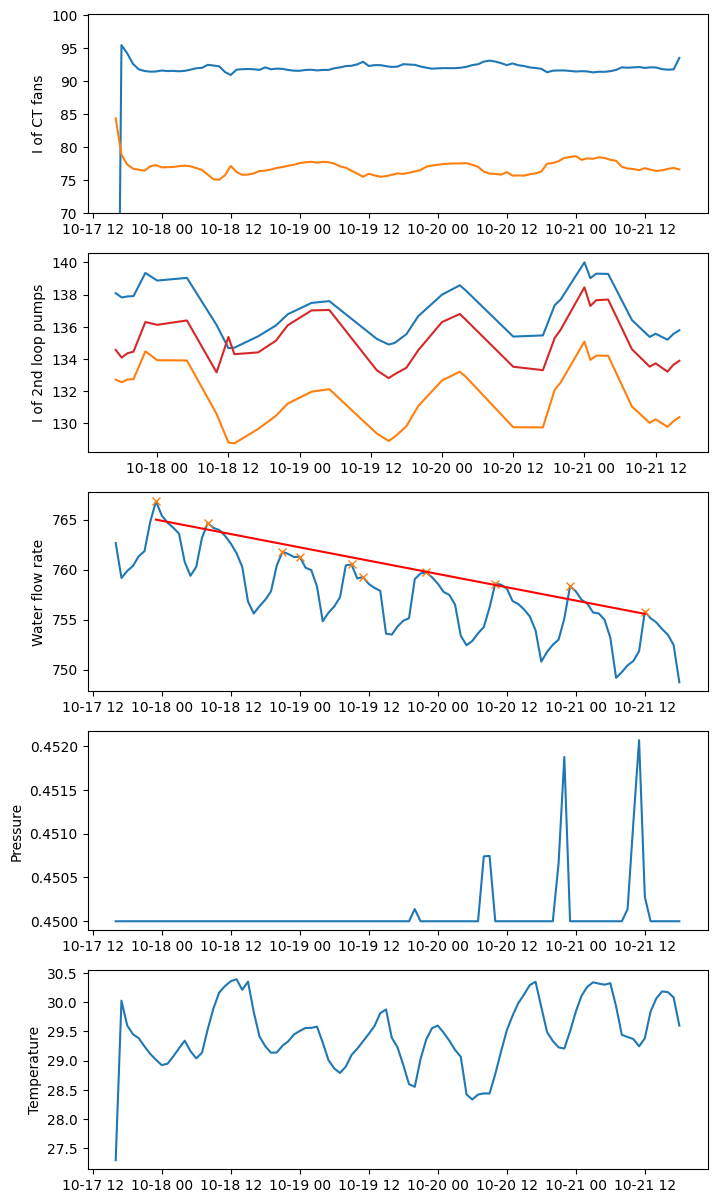

In [63]:
# compare water flow rate, ct fans, temperature and I pumps and pressure
# the pumps I change do not make any effect of water flow rate
fig, axs = plt.subplots(5,1, figsize=(8,15))
axs[0].plot(ctf_1_fp)
axs[0].plot(ctf_2_fp)
axs[0].set_ylabel("I of CT fans")
axs[0].set_ylim(70)
axs[1].plot(df_pumps_fp_oper_ls)
axs[1].set_ylabel("I of 2nd loop pumps")
axs[2].plot(df_fp_tl_1h[481])
axs[2].plot(df_fp_tl_1h.iloc[Q2_peaks][481], "x")
axs[2].plot(df_peaks.index, Q2_clear_lrm.predict(X_clear), color="red")
axs[2].set_ylabel("Water flow rate")
axs[3].plot(df_fp_tl_1h[309])
axs[3].set_ylabel("Pressure")
axs[4].plot(df_fp_tl_1h[319])
axs[4].set_ylabel("Temperature")


## Taking into account all anylasys above some highlights can be made:
* Water flow rate loses (daily lose) can be easy supress by taking max value (when we do not feed ct pool)
* If cooling tower fans operates for whole week we can consider whole week as as steady state condition
* Pereodical changes in I of pumps that do not lead to water flow decreasing can be ignored (need to check in detail)
* At the end of first period (2022-10-17 2022-10-21) minor increase of pressure is observed but more statistics required
* Examined pumps I can be useful to research how different pumps can interfere each other
* 60 min groupby recommended for further use

## Upon above the following IDs must be used:

* 299 Т1к после ТО
* 307 P1контура
* 309 Р2контура
* 313 Рградирни
* 315 Т1к перед ТО
* 317 Т2к перед ТО
* 319 Т2к после ТО
* 325 Т2к выхТО1
* 327 Твозвуха
* 381 Iвг1
* 395 Iвг2
* 396 Iвг3
* 406 2-1
* 407 2-2
* 408 2-3
* 409 2-4
* 460 Т2к выхТО2
* 461 Т2к выхТО3
* 462 Т2к выхТО4
* 463 Т2к выхТО5
* 480 Q1контура
* 481 Q2контура


